# DATA VISUALIZATION PROJECTS


### Source: Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

### Note: number is slightly lower than published data because I only include continental USA for better situation reflection

### Please use Toggle Code button to see only visualizations or explore my full code with detailed comments

In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

from plotly import __version__
import chart_studio.plotly as py
# use plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# use for map graph
import plotly.graph_objs as go 

import plotly.express as px 

import cufflinks as cf
# connect js with pandas and python
init_notebook_mode(connected=True)
# use cufflink offline
cf.go_offline()

Toggle code

In [2]:
# LINKS FOR DATA
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

# Source Cases Data

In [3]:
# ORIGINAL DATA OF CASES
df_confirmed = pd.read_csv(url_confirmed)
df_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1690,1691,1714,1715,1738,1757,1764,1773,1785,1787
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,5061,5087,5124,5141,5165,5456,5477,5526,5588,5606
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,835,838,848,851,857,873,882,885,886,886
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,632,636,635,638,642,652,654,656,657,658
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1551,1560,1573,1580,1594,1608,1611,1617,1618,1621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,498,504,506,517,529,532,536,554,560,560
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,334,335,339,342,347,348,350,352,354,354
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,113,113,113,113,113,114,114,115,115,116


# Source Deaths Data

In [4]:
# ORIGINAL DATA OF DEATHS
df_death = pd.read_csv(url_death)
df_death

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,24,24,25,25,25,25,25,25,25,27
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,49,49,49,49,50,50,50,50,50,50
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,10,10,10,10,10,10,10,10,10,10
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14,14,14,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1,1,1,1,1,1,1,1,1,1
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2,2,2,2,2,2,2,2,2,2
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,6,6,6,6,6,6,6,6,6,6


# START DATA CLEANING AND ORGANIZING FROM HERE

In [5]:
# Use melt to transform wide data to long data
# Date start from column 11th
date_value = df_confirmed.columns[11:]

# Only take Province State, County(Admin2) and Cases data
df_confirmed = df_confirmed.melt(id_vars = ['Province_State','Admin2'], value_vars = date_value,
                                 var_name = 'Date', value_name= 'Cases')

# Only take Province State, County(Admin2) and Deaths data
df_death = df_death.melt(id_vars = ['Province_State','Admin2'], value_vars = date_value,
                                 var_name = 'Date', value_name= 'Deaths')

In [6]:
# Merge data of cases and deaths together
df_full = df_confirmed.merge(df_death, on = ['Province_State', 'Date', 'Admin2'])

# Convert Date column to date object
df_full['Date'] = pd.to_datetime(df_full['Date']).dt.date

# Counties and States Data

In [7]:
# Data that has both counties and states
df_full

,Province_State,Admin2,Date,Cases,Deaths
0,Alabama,Autauga,2020-01-22,0,0
1,Alabama,Baldwin,2020-01-22,0,0
2,Alabama,Barbour,2020-01-22,0,0
3,Alabama,Bibb,2020-01-22,0,0
4,Alabama,Blount,2020-01-22,0,0
...,...,...,...,...,...
841675,Wyoming,Teton,2020-09-29,560,1
841676,Wyoming,Uinta,2020-09-29,354,2
841677,Wyoming,Unassigned,2020-09-29,0,0
841678,Wyoming,Washakie,2020-09-29,116,6


In [8]:
# SUM THE COUNTY DATA FOR STATE

# Calculate sum by using groupby of date and state to connect all duplicate result from different county in a state
byDate = df_full.groupby(['Date', 'Province_State'], as_index = False).sum()
df = pd.DataFrame(byDate)

# Drop county column because they're no longer needed
df = df[['Date', 'Province_State','Cases', 'Deaths']]

# Remove these region from the data (only consider continental US)
df = df[df['Province_State'] != 'Diamond Princess']
df = df[df['Province_State'] != 'Grand Princess']
df = df[df['Province_State'] != 'Guam']
df = df[df['Province_State'] != 'Puerto Rico']
df = df[df['Province_State'] != 'Northern Mariana Islands']
df = df[df['Province_State'] != 'American Samoa']
df = df[df['Province_State'] != 'District of Columbia']
df = df[df['Province_State'] != 'Virgin Islands']


In [9]:
# start the date from march
df = df.iloc[1950:]
df.reset_index(drop = True, inplace=True)

# Data after cleaning

In [10]:
# DATA AFTER CLEANING
df

,Date,Province_State,Cases,Deaths
0,2020-03-01,Alabama,0,0
1,2020-03-01,Alaska,0,0
2,2020-03-01,Arizona,1,0
3,2020-03-01,Arkansas,0,0
4,2020-03-01,California,12,0
...,...,...,...,...
10645,2020-09-29,Virginia,147345,3185
10646,2020-09-29,Washington,87042,2124
10647,2020-09-29,West Virginia,15693,350
10648,2020-09-29,Wisconsin,119955,1300


In [11]:
# Create daily confirmed and daily death columns. Current cases/deaths - previous cases/deaths.
for i in range(51, len(df)):
    df.loc[i, 'Daily_Cases'] = df.loc[i, 'Cases'] - df.loc[i-50, 'Cases']
    df.loc[i, 'Daily_Deaths'] = df.loc[i, 'Deaths'] - df.loc[i-50, 'Deaths']

# Create fatality rate column
df['Fatality_Rate'] = df['Deaths'] / df['Cases'] * 100

# Fill in nan value for the first date (daily case = case in the first day)
for i in range(50):
    df.loc[i, 'Daily_Cases'] = df.loc[i, 'Cases']
    df.loc[i, 'Daily_Deaths'] = df.loc[i, 'Deaths']
    
# Fill in nan value for fatality rate
for i in range(len(df)):
    if df.loc[i, 'Deaths'] == 0:
        df.loc[i,'Fatality_Rate'] = 0


# Data after adding daily cases/deaths and fatality rate

In [12]:
# DATA AFTER ADDING DAILY CASES/DEATHS COLUMNS AND FATALITY RATE
df

,Date,Province_State,Cases,Deaths,Daily_Cases,Daily_Deaths,Fatality_Rate
0,2020-03-01,Alabama,0,0,0.0,0.0,0.000000
1,2020-03-01,Alaska,0,0,0.0,0.0,0.000000
2,2020-03-01,Arizona,1,0,1.0,0.0,0.000000
3,2020-03-01,Arkansas,0,0,0.0,0.0,0.000000
4,2020-03-01,California,12,0,12.0,0.0,0.000000
...,...,...,...,...,...,...,...
10645,2020-09-29,Virginia,147345,3185,901.0,15.0,2.161594
10646,2020-09-29,Washington,87042,2124,404.0,24.0,2.440201
10647,2020-09-29,West Virginia,15693,350,177.0,8.0,2.230294
10648,2020-09-29,Wisconsin,119955,1300,2367.0,17.0,1.083740


In [13]:
# Create two seperate data frame that has average and total number
by_avg = pd.DataFrame(df.groupby('Date', as_index = False).mean())
by_total = pd.DataFrame(df.groupby('Date', as_index = False).sum())

by_avg.insert(loc = 1, column = 'Province_State', value = 'State Average')
by_total.insert(loc = 1, column = 'Province_State', value = 'US Total')

# Fix fatality rate column or it won't be correct due to the sum function
by_total['Fatality_Rate'] = by_total['Deaths'] / by_total['Cases'] * 100

# New data frame that's similar to df but has State Average and US Total row at the end of each date
# Reason to split: avoid messing up the index for 50 states 
# Use slice method
df2 = pd.DataFrame()
j = 0
while j < len(df):
    for i in range(0, len(by_avg)):
         # get every 50 row (represent 1 date) from df and add by_total and by_avg row. Then, concat to df2
        df2 = pd.concat([df2, df.iloc[j:j+50].append([by_avg.iloc[i], by_total.iloc[i]])]).reset_index(drop=True)
        j+=50

# State Avg and US Data

In [14]:
# Similar to original data but has State Avg and Total row
df2

,Date,Province_State,Cases,Deaths,Daily_Cases,Daily_Deaths,Fatality_Rate
0,2020-03-01,Alabama,0.0,0.00,0.00,0.00,0.000000
1,2020-03-01,Alaska,0.0,0.00,0.00,0.00,0.000000
2,2020-03-01,Arizona,1.0,0.00,1.00,0.00,0.000000
3,2020-03-01,Arkansas,0.0,0.00,0.00,0.00,0.000000
4,2020-03-01,California,12.0,0.00,12.00,0.00,0.000000
...,...,...,...,...,...,...,...
11071,2020-09-29,West Virginia,15693.0,350.00,177.00,8.00,2.230294
11072,2020-09-29,Wisconsin,119955.0,1300.00,2367.00,17.00,1.083740
11073,2020-09-29,Wyoming,5821.0,50.00,67.00,0.00,0.858959
11074,2020-09-29,State Average,142449.6,4092.68,818.94,17.96,2.659174


# US Data

In [15]:
# US Data
by_total

,Date,Province_State,Cases,Deaths,Daily_Cases,Daily_Deaths,Fatality_Rate
0,2020-03-01,US Total,32,1,32.0,1.0,3.125000
1,2020-03-02,US Total,54,6,22.0,5.0,11.111111
2,2020-03-03,US Total,74,7,20.0,1.0,9.459459
3,2020-03-04,US Total,107,11,33.0,4.0,10.280374
4,2020-03-05,US Total,184,12,77.0,1.0,6.521739
...,...,...,...,...,...,...,...
208,2020-09-25,US Total,6968841,202429,53905.0,941.0,2.904773
209,2020-09-26,US Total,7013636,203161,44795.0,732.0,2.896657
210,2020-09-27,US Total,7049629,203425,35993.0,264.0,2.885613
211,2020-09-28,US Total,7081533,203736,31904.0,311.0,2.877004


In [16]:
# Add state abbrev to use for world map (locations)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'State Average': 'Average',
    'US Total': 'Total',
}    
for i in range(len(df)):
    df.loc[i, 'State'] = us_state_abbrev[df.loc[i, 'Province_State']]    

# GRAPHS AND PLOTS START

In [17]:
# Overall picture of US cases
trace1 = go.Scatter(
   x = by_total['Date'],
   y = by_total['Cases'],
   name = 'Cases'
)
trace2 = go.Scatter(
   x = by_total['Date'],
   y = by_total['Deaths'],
   name = 'Deaths',
   yaxis = 'y'
)

data = [trace1, trace2]
fig = go.Figure(data = data,layout = go.Layout(title = 'US Total Cases and Total Deaths'))
iplot(fig)

In [18]:
# US Fatality Rate
by_total.iplot(x = 'Date', y = 'Fatality_Rate', title = 'US Fatality Rate',
               xTitle = 'Date', yTitle = 'Case Fatality Rate')

In [19]:
# Total cases of each states
fig2 = go.Figure(layout = go.Layout(title = 'Cases of States'))
for a, b in df.groupby('Province_State'):
    fig2.add_scatter(x=b.Date, y=b.Cases, name=a, mode='lines')
fig2

In [20]:
# Daily Cases of States
# The loop function replace hue in seaborn because plotly doesn't have hue
fig3 = go.Figure(layout = go.Layout(title = 'Daily Cases of States'))
for a, b in df.groupby('Province_State'):
    fig3.add_scatter(x=b.Date, y=b.Daily_Cases, name=a, mode='lines')
fig3

10604    California
10642         Texas
10608       Florida
10631      New York
10609       Georgia
Name: Province_State, dtype: object

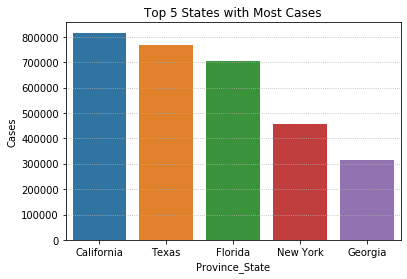

In [21]:
# Find top 5 state that has the most cases
# df.iloc[-1]['Date'] refer to the final date
plt.title('Top 5 States with Most Cases')
plt.grid(ls = ':')
top5 = df[df['Date'] == df.iloc[-1]['Date']].nlargest(5, 'Cases')
sns.barplot(x = 'Province_State', y = 'Cases', data = top5)
top_state = top5['Province_State']
top_state

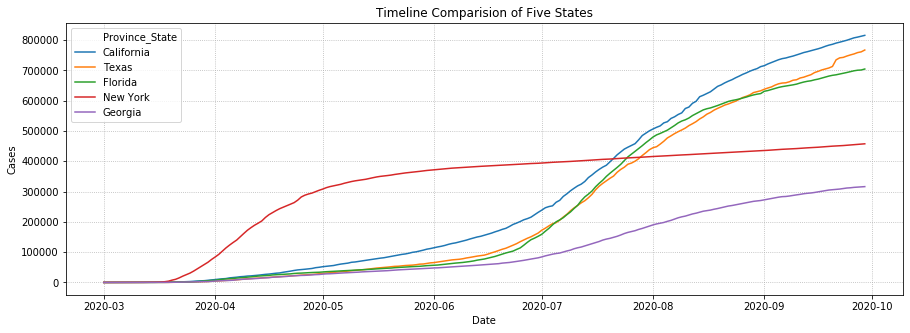

In [22]:
# Timeline comparison of top 5 states
plt.figure(figsize=(15,5))
plt.grid(ls = ':')
plt.title('Timeline Comparision of Five States')
sns.lineplot(x = 'Date', y = 'Cases', hue = 'Province_State', hue_order = top_state, data = df)

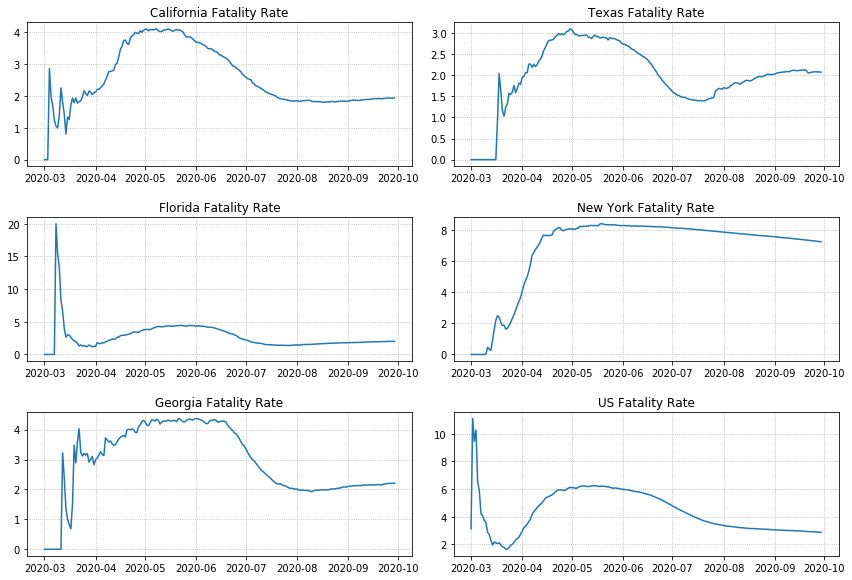

In [23]:
# Compare top 5 states fatality rate vs US fatality rate
first = df[df['Province_State'] == top_state.iloc[0]]
second = df[df['Province_State'] == top_state.iloc[1]]
third = df[df['Province_State'] == top_state.iloc[2]]
fourth = df[df['Province_State'] == top_state.iloc[3]]
fifth = df[df['Province_State'] == top_state.iloc[4]]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = [12,8])
fig.tight_layout(h_pad = 3)
axes[0][0].plot(first['Date'], first['Fatality_Rate'])
axes[0][1].plot(second['Date'], second['Fatality_Rate'])
axes[1][0].plot(third['Date'], third['Fatality_Rate'])
axes[1][1].plot(fourth['Date'], fourth['Fatality_Rate'])
axes[2][0].plot(fifth['Date'], fifth['Fatality_Rate'])
axes[2][1].plot(by_total['Date'], by_total['Fatality_Rate'])


axes[0][0].set_title(top_state.iloc[0] + ' Fatality Rate')
axes[0][1].set_title(top_state.iloc[1] + ' Fatality Rate')
axes[1][0].set_title(top_state.iloc[2] + ' Fatality Rate')
axes[1][1].set_title(top_state.iloc[3] + ' Fatality Rate')
axes[2][0].set_title(top_state.iloc[4] + ' Fatality Rate')
axes[2][1].set_title('US Fatality Rate')

# Turn on grid for better visibility
for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].grid(ls=':')


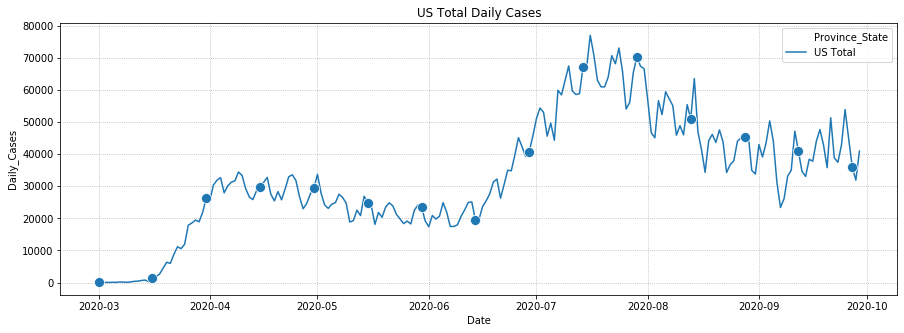

In [24]:
# US TOTAL DAILY CASES
plt.figure(figsize=(15,5))
# marker for every 2 weeks
sns.lineplot(x = 'Date', y = 'Daily_Cases', hue = 'Province_State', data = by_total,
             marker = 'o', markersize = 10, markevery = 15)
plt.title('US Total Daily Cases')
plt.grid(True, ls = ':')

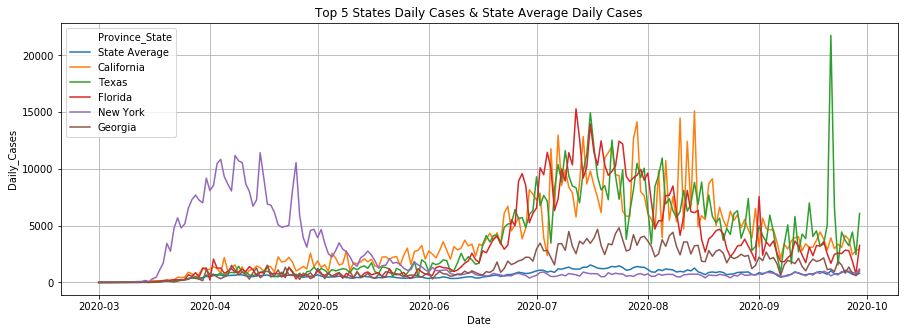

In [25]:
compare = pd.Series(['State Average'])
compare = compare.append(top_state, ignore_index=True)
plt.figure(figsize=(15,5))
sns.lineplot(x = 'Date', y = 'Daily_Cases', hue = 'Province_State', hue_order = compare ,data = df2)
plt.title('Top 5 States Daily Cases & State Average Daily Cases')
plt.grid(True)

Text(0.5, 1.0, 'Scatter Plot of US Daily Cases')

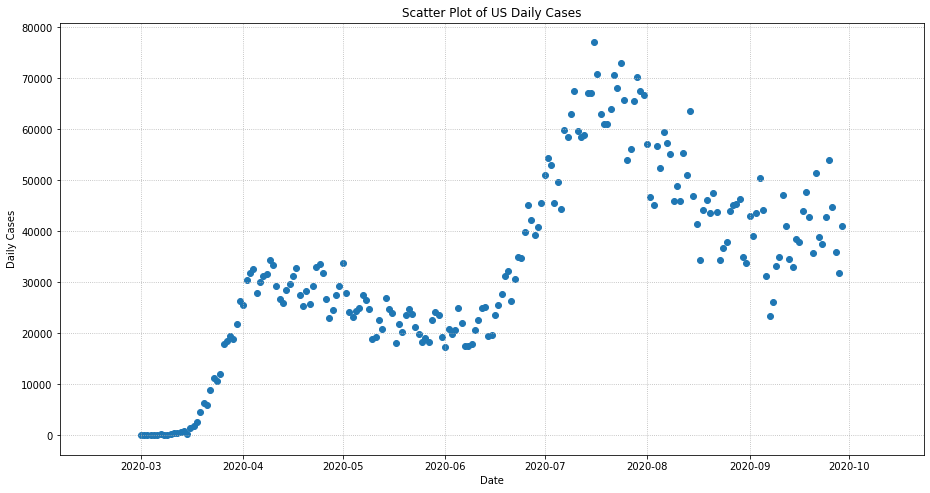

In [26]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 1.5])
ax.scatter(by_total['Date'], by_total['Daily_Cases'])
ax.grid(ls = ':')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Cases')
ax.set_title('Scatter Plot of US Daily Cases')

In [27]:
# Locations is required if I want it to work
# Need to specify the final date because it's the latest data
# df.iloc[-1]['Date'] refer to the final date
final_date = pd.DataFrame(df[df['Date'] == df.iloc[-1]['Date']])
data = dict(type='choropleth',
            colorscale = 'reds',
            locations = final_date['State'],
            z = final_date['Cases'],
            locationmode = 'USA-states',
            text = final_date['Province_State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            ) 

# US Choropleth Map

In [28]:
# Choropleth MAP OF TOTAL CASES
layout = dict(geo = {'scope':'usa'})
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# US Daily Cases Heatmap

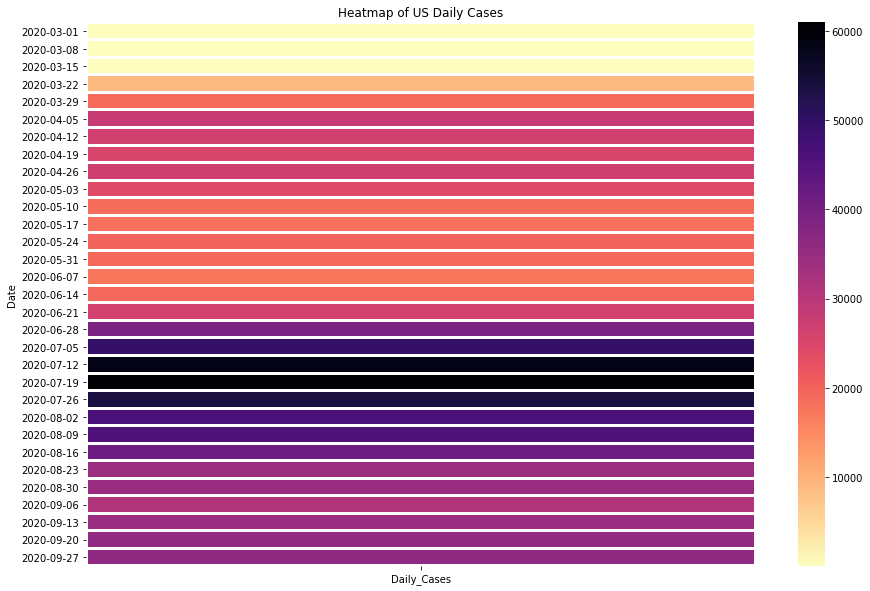

In [29]:
# HEAT MAP FOR US DAILY CASES
plt.figure(figsize=(15,10))
plt.title('Heatmap of US Daily Cases')
heatmap = pd.DataFrame()
us_total = by_total.pivot_table(values='Daily_Cases',index='Date')
# create a new data frame from us_total every 7 row (which means every week)
heatmap = us_total.iloc[::7,:]
# _r in cmap is to reverse color
sns.heatmap(heatmap, cmap = 'magma_r', lw = 2)